In [70]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [71]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

In [72]:
dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [73]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [74]:
dataset = dataset.dropna()

In [75]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [76]:
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1


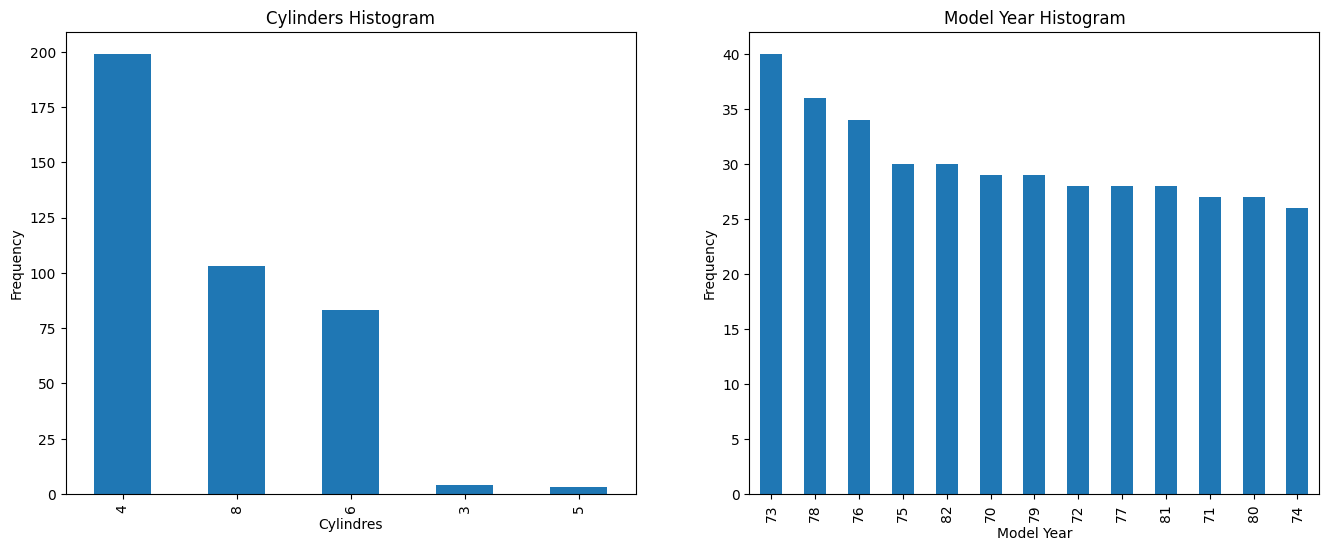

In [77]:
plt.figure(figsize=(25, 6))
plt.subplot(1,3,1)
plt1 = dataset.Cylinders.value_counts().plot(kind = 'bar')
plt.title('Cylinders Histogram')
plt1.set(xlabel = 'Cylindres', ylabel='Frequency')

plt.subplot(1,3,2)
plt1 = dataset['Model Year'].value_counts().plot(kind = 'bar')
plt.title('Model Year Histogram')
plt1.set(xlabel = 'Model Year', ylabel='Frequency')
plt.show()

In [79]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

In [81]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [82]:
normalizer.adapt(np.array(train_features))

In [83]:
horsepower = np.array(train_features['Horsepower'])

horsepower_normalizer = layers.Normalization(input_shape=[1,], axis=None)
horsepower_normalizer.adapt(horsepower)

In [84]:
horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    layers.Dense(units=1)
])

horsepower_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_5 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [85]:
horsepower_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [89]:
history = horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    epochs=100)

Epoch 1/100
10/10 [==============================] - 0s 2ms/step - loss: 3.8788
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 3.8848
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 3.8740
Epoch 4/100
10/10 [==============================] - 0s 1ms/step - loss: 3.8693
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 3.8717
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 3.8710
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 3.8676
Epoch 8/100
10/10 [==============================] - 0s 1ms/step - loss: 3.8731
Epoch 9/100
10/10 [==============================] - 0s 1ms/step - loss: 3.8693
Epoch 10/100
10/10 [==============================] - 0s 1ms/step - loss: 3.8675
Epoch 11/100
10/10 [==============================] - 0s 2ms/step - loss: 3.8670
Epoch 12/100
10/10 [==============================] - 0s 2ms/step - loss: 3.8718
Epoch 13/100
10/10 [=================

In [86]:
%%time
history = horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    epochs=100,
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 3.36 s, sys: 360 ms, total: 3.72 s
Wall time: 2.99 s


In [87]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

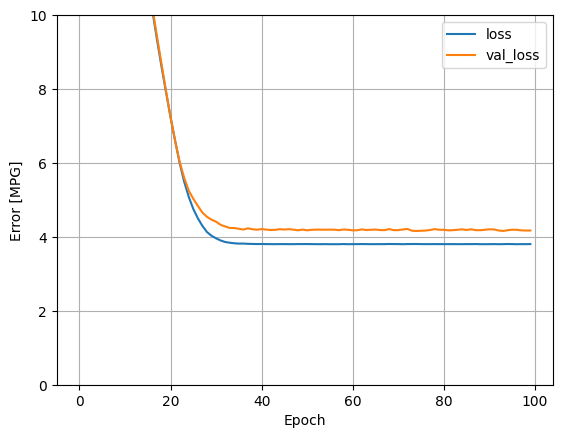

In [88]:
plot_loss(history)